In [1]:
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.dpi"] = 600

In [2]:
def read_avg(filename):
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3)) 
        total.append(n)
    return total


def collect(task):
    d25 = [[], [], []]
    d4 = [[], [], []]
    for i in range(len(task)):
        if 'BGMA' in task[i]:
            d25[0].append(1.9)
            d25[1].append(7200)
            d25[2].append(0)
            d4[0].append(1.9)
            d4[1].append(7200)
            d4[2].append(0)
        else:
            [l1, l2, l3] = read_avg(task[i])
            d25[0].append(l1[0])
            d25[1].append(l2[0])
            d25[2].append(l3[0])
            d4[0].append(l1[1])
            d4[1].append(l2[1])
            d4[2].append(l3[1])
    return d25, d4


In [3]:
# get total latency stats (avg, min, max)

def read(filename):
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total


def read_stats(task):
    out = []
    for i in range(len(task)):
        total = []
        if 'BGMA' in task[i]:
            for k in range(20):
                total.append(7200)
        else:
            [l1, l2, l3] = read(task[i])
            for k in range(len(l1)):
                total.append(round(l1[k] + l2[k] + l3[k], 3))
        for k in range(0, 20, 10):
            avgV = round(sum(total[k+3:k+7])/4, 3)
            minV = round(min(total[k+3:k+7]), 3)
            maxV = round(max(total[k+3:k+7]), 3)
            if i == len(out) - 1:
                out[i].append((avgV, minV, maxV))
            else:
                out.append([(avgV, minV, maxV)])
    return out


In [4]:
def collect_error(task):
    d25_upper = []
    d4_upper = []
    d25_lower = []
    d4_lower = []
    d25_avg = []
    d4_avg = []
    error = read_stats(task)
    for i in range(len(error)):
        d25_upper.append(error[i][0][2]-error[i][0][0])
        d25_lower.append(error[i][0][0]-error[i][0][1])
        d4_upper.append(error[i][1][2]-error[i][1][0])
        d4_lower.append(error[i][1][0]-error[i][1][1])
    return d25_upper, d25_lower, d4_upper, d4_lower


def runall(taskList):
    y = ['#A4DCFE', '#0398F3', '#026FB2']
    b = ['#FAAF8E', '#F67136', '#B03C08']

    xname = ['BHMS', 'NHMA', 'DHMS', 'BHSS', 'BHM\'A', 'BGMA', 'BBMS', 'BHMA', 'DBMS', 'DHMA', 'DBMA', 'BBMA',
            'BHM\'S', 'DHM\'S', 'BBM\'S', 'DBM\'S', 'DHM\'A', 'DBM\'A', 'BBM\'A']
    
    x1 = list(range(len(xname)))

    width = 0.32

    x2 = []
    for i in range(len(xname)):
        x2.append(x1[i] + width + 0.05)
    x = []
    for i in range(len(xname)):
        x.append(x1[i] + width/2 + 0.025)

    title = ['(a) uniform', '(b) interleaved ordered', '(c) 50% ordered']

    error_params=dict(elinewidth=1,ecolor='grey',capsize=3)
    ylim = 50
    ystep = 10

    plt.rcParams['hatch.linewidth'] = 0.2

    for idx in range(len(taskList)+1):
        plt.figure(figsize=(8, 2))
        if idx == len(taskList):
            plt.rcParams['hatch.linewidth'] = 0.5
            plt.bar(x1, [0 for i in range(len(xname))], width=width, color=y[-2], edgecolor='black', linewidth=0.5, label='1/25 DRAM')
            plt.bar(x2, [0 for i in range(len(xname))], width=width, color=b[-2], edgecolor='black', linewidth=0.5, hatch='////////', label='1/4 DRAM')
            plt.legend(ncol=2, bbox_to_anchor=(1, -0.55), handlelength=0.7, handletextpad=0.4, columnspacing=1.8, fontsize=8)
            plt.tight_layout()
            # plt.savefig('fig/tree_legend.pdf', format='pdf')
            plt.rcParams['hatch.linewidth'] = 0.2
            plt.figure(figsize=(8, 2))
            plt.bar(x1, [0 for i in range(len(d25[0]))], width=width, color='white', edgecolor='black', label=
                'Dim #1: N-noBatch, B-singleBuffer, D-doubleBuffer')
            plt.bar(x1, [0 for i in range(len(d25[0]))], width=width, color='white', edgecolor='black', label=
                'Dim #3: S-singleThread, M\'-Multi, M-BASawareMulti')
            plt.bar(x1, [0 for i in range(len(d25[0]))], width=width, color='white', edgecolor='black', label=
                'Dim #2: G-globalTree, H-hashSearch, B-binarySearch')
            plt.bar(x1, [0 for i in range(len(d25[0]))], width=width, color='white', edgecolor='black', label=
                'Dim #4: S-synchronous, A-asynchronous')
            plt.legend(ncol=2, bbox_to_anchor=(1, -0.55), handlelength=0.7, handletextpad=0.4, columnspacing=1.8, fontsize=8)
        else:
            task = taskList[idx]
            d25, d4 = collect(task)
            d25_upper, d25_lower, d4_upper, d4_lower = collect_error(task)
            plt.bar(x1, d25[0], width=width, color=y[-1], edgecolor='black', linewidth=0.23)
            plt.bar(x1, d25[1], width=width, color=y[-2], edgecolor='black', linewidth=0.23, bottom=d25[0])
            plt.bar(x1, d25[2], width=width, color=y[-3], edgecolor='black', linewidth=0.23, bottom=[d25[0][i]+d25[1][i] for i in range(len(d25[0]))], yerr=[d25_lower, d25_upper], error_kw=error_params)
            plt.bar(x2, d4[0], width=width, color=b[-1], edgecolor='black', linewidth=0.23)
            plt.bar(x2, d4[1], width=width, color=b[-2], edgecolor='black', linewidth=0.23, bottom=d4[0])
            plt.bar(x2, d4[2], width=width, color=b[-3], edgecolor='black', linewidth=0.23, bottom=[d4[0][i]+d4[1][i] for i in range(len(d4[0]))], yerr=[d4_lower, d4_upper], error_kw=error_params)
            plt.bar(x2, [d4[0][i]+d4[1][i]+d4[2][i] for i in range(len(d4[0]))], width=width, facecolor='none', hatch='/')
            for i in range(len(d25[0])):
                if d25[0][i]+d25[1][i]+d25[2][i] > ylim:
                    if d25[0][i]+d25[1][i]+d25[2][i] > 1000: out25, out4 = '>2h', '>2h'
                    else: out25, out4 = round(d25[0][i]+d25[1][i]+d25[2][i]), round(d4[0][i]+d4[1][i]+d4[2][i])
                    if d25[0][i]+d25[1][i]+d25[2][i] < 100: xoff = 0.105
                    elif out25 == '>2h': xoff = 0.255
                    else: xoff = 0.225
                    plt.text(x1[i]-xoff-0.3, ylim*0.9, out25, color='black', size=8)    # weight='bold'
                    plt.text(x2[i]-xoff+0.1, ylim*0.9, out4, color='black', size=8)
            plt.xticks(x, xname, size=9, rotation=90)
            plt.yticks(range(0, ylim+1, ystep), size=9)
            plt.ylim(0, ylim)
            plt.ylabel('Latency (s)', size=8)
            plt.grid(linestyle='--', axis='y', alpha=0.3)
        plt.tight_layout()
        # plt.savefig('fig/tree_'+str(idx)+'.pdf', format='pdf')

    plt.show()

In [5]:
folder = '20231025_tree'
datasize = '400m'
datatype = ['uniform', 'skew_2', 'skew_50']
date = '20231025'
file = ['v1_BHMS', 'v3_NHMA', 'v4_DHMS', 'v7_BHSA', 'v7_BHmA', 'v11_BGMA', 'v2_BBMS', 'v7_BHMA', 'v8_DBMS', 'v5_DHMA', 'v9_DBMA', 'v10_BBMA',
        'v1_BHmS', 'v4_DHmS', 'v2_BBmS', 'v8_DBmS', 'v5_DHmA', 'v9_DBmA', 'v10_BBmA']

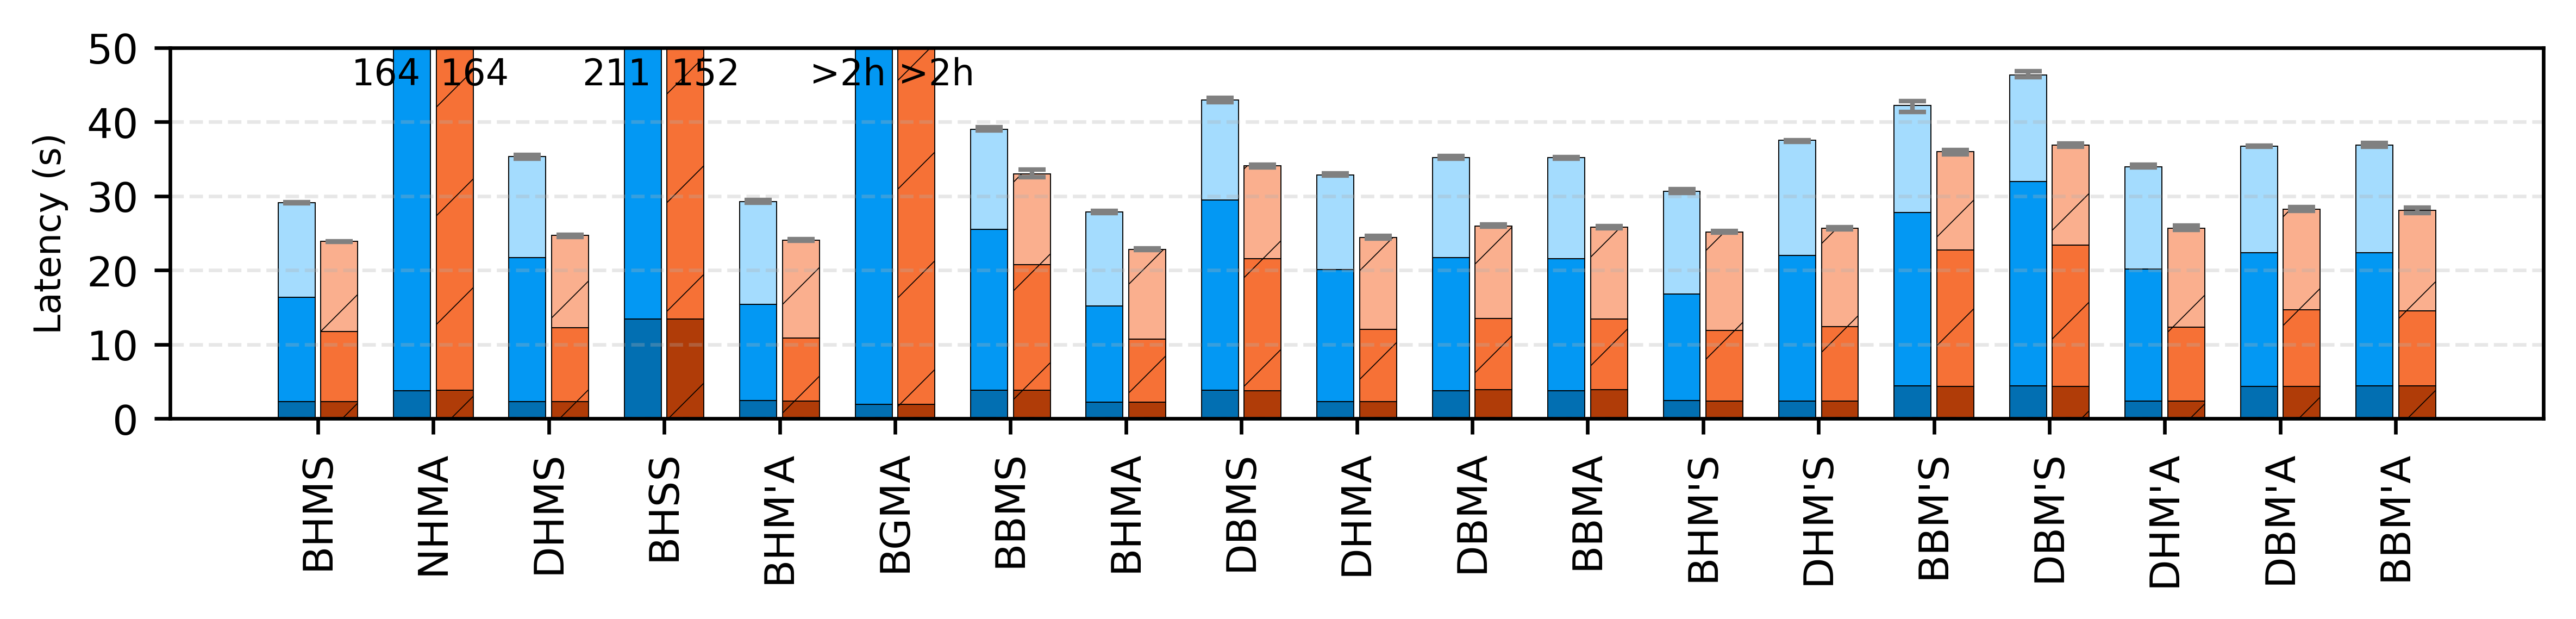

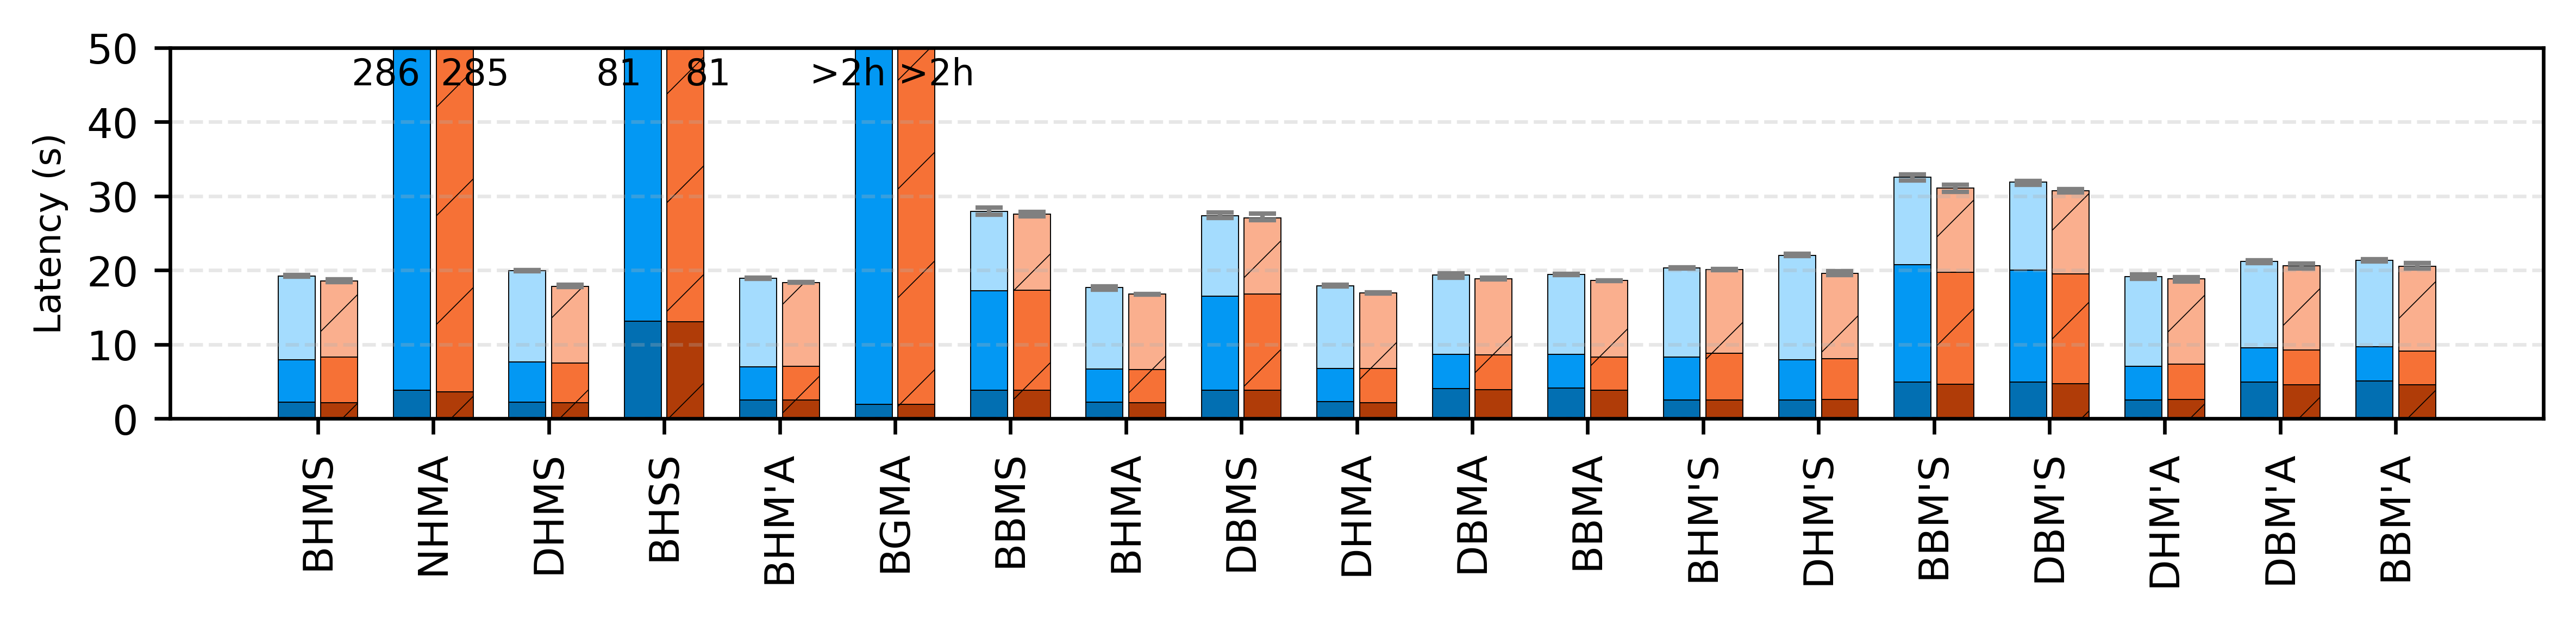

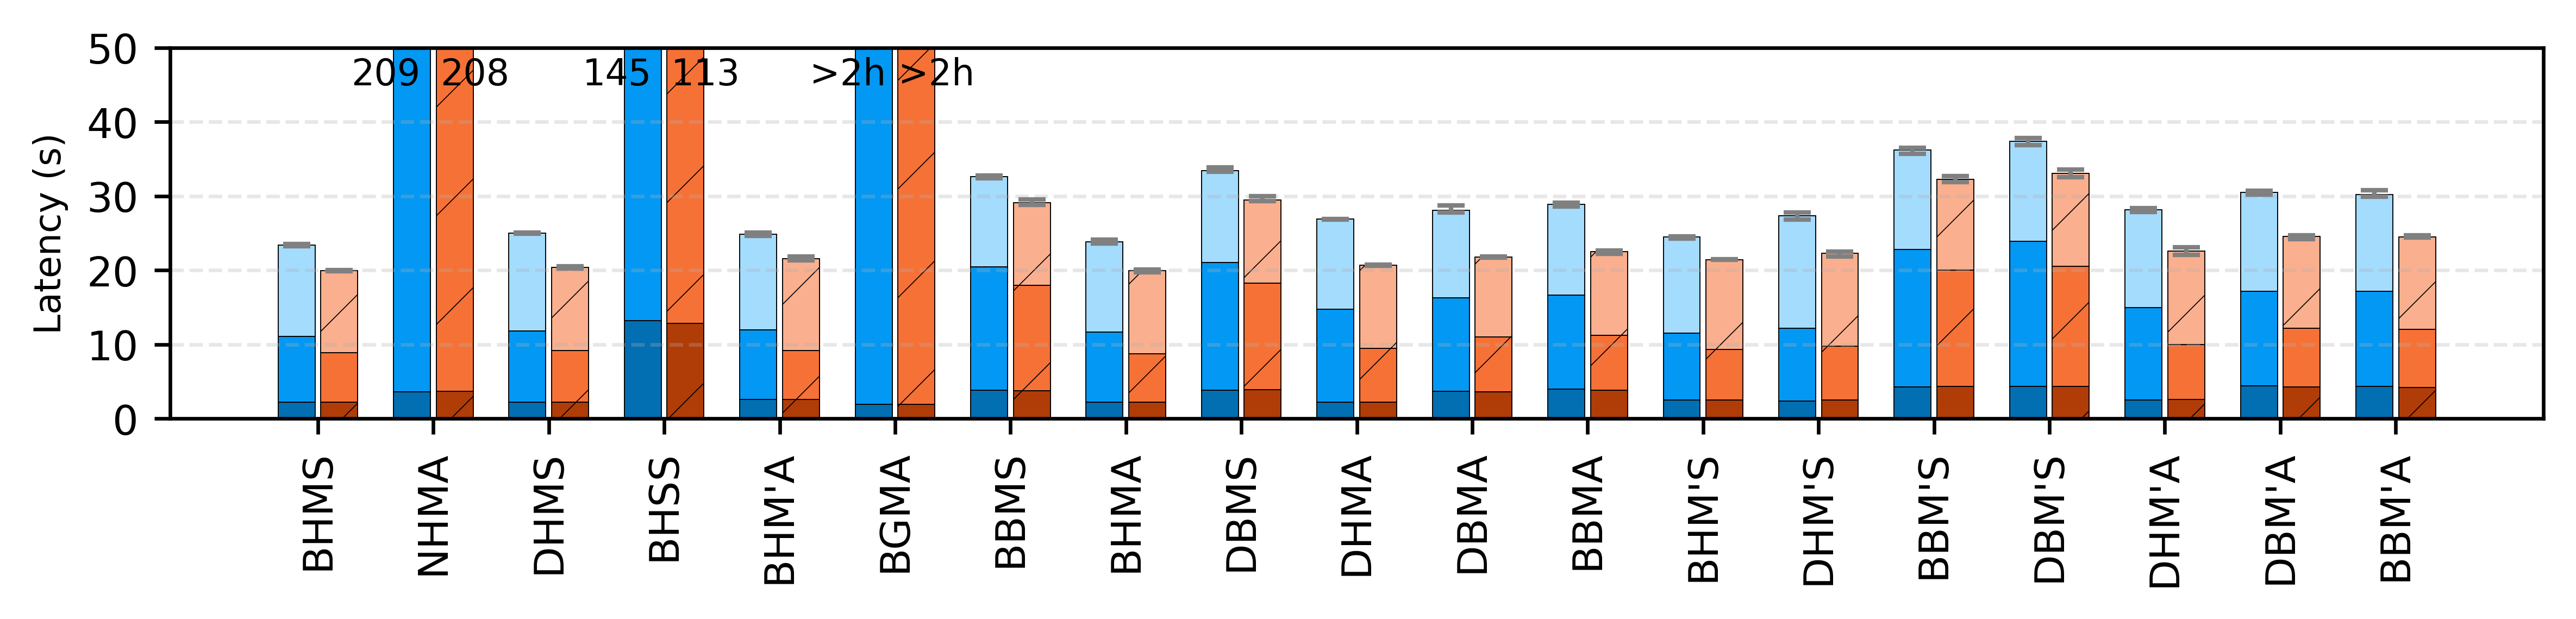

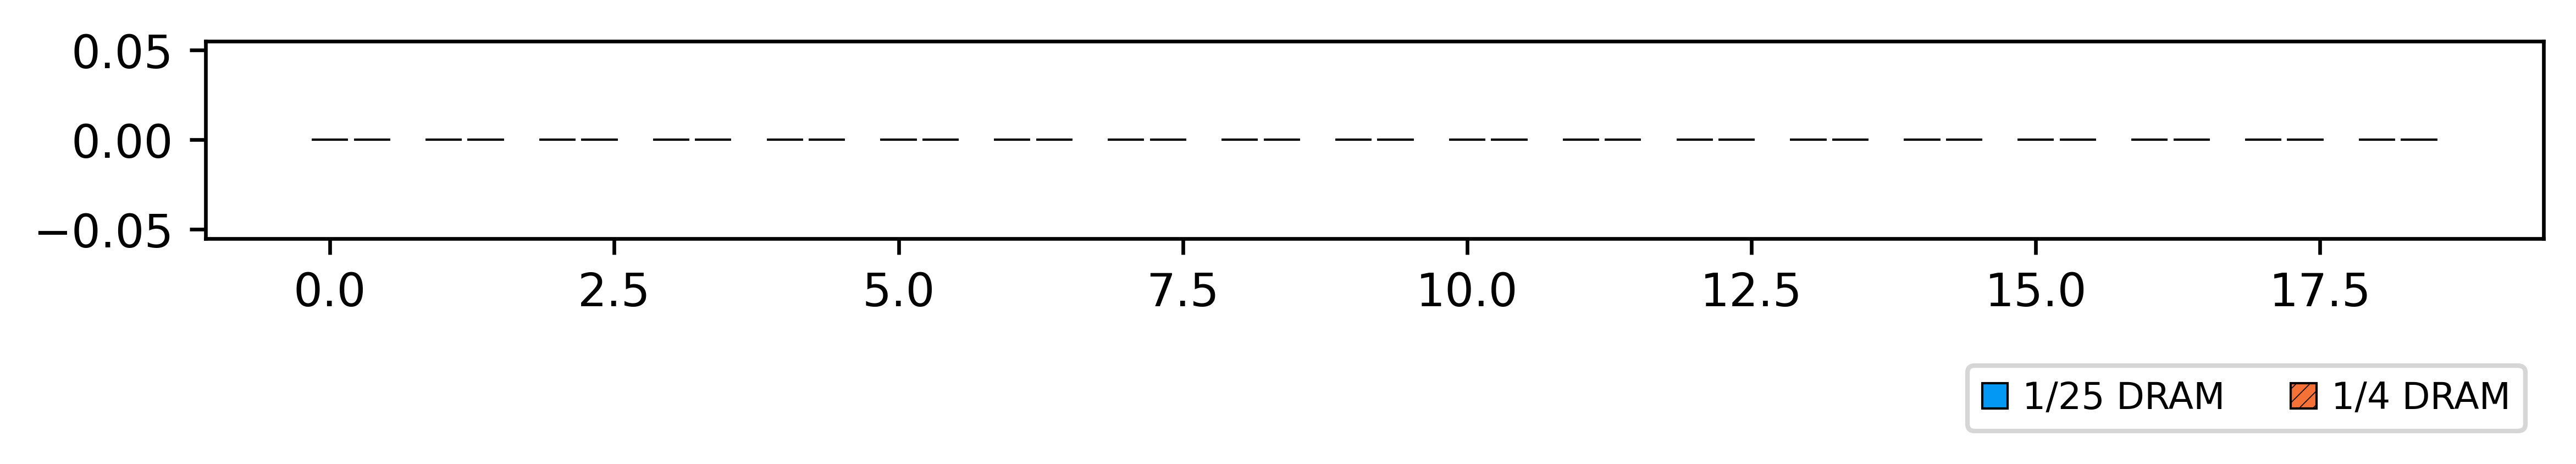

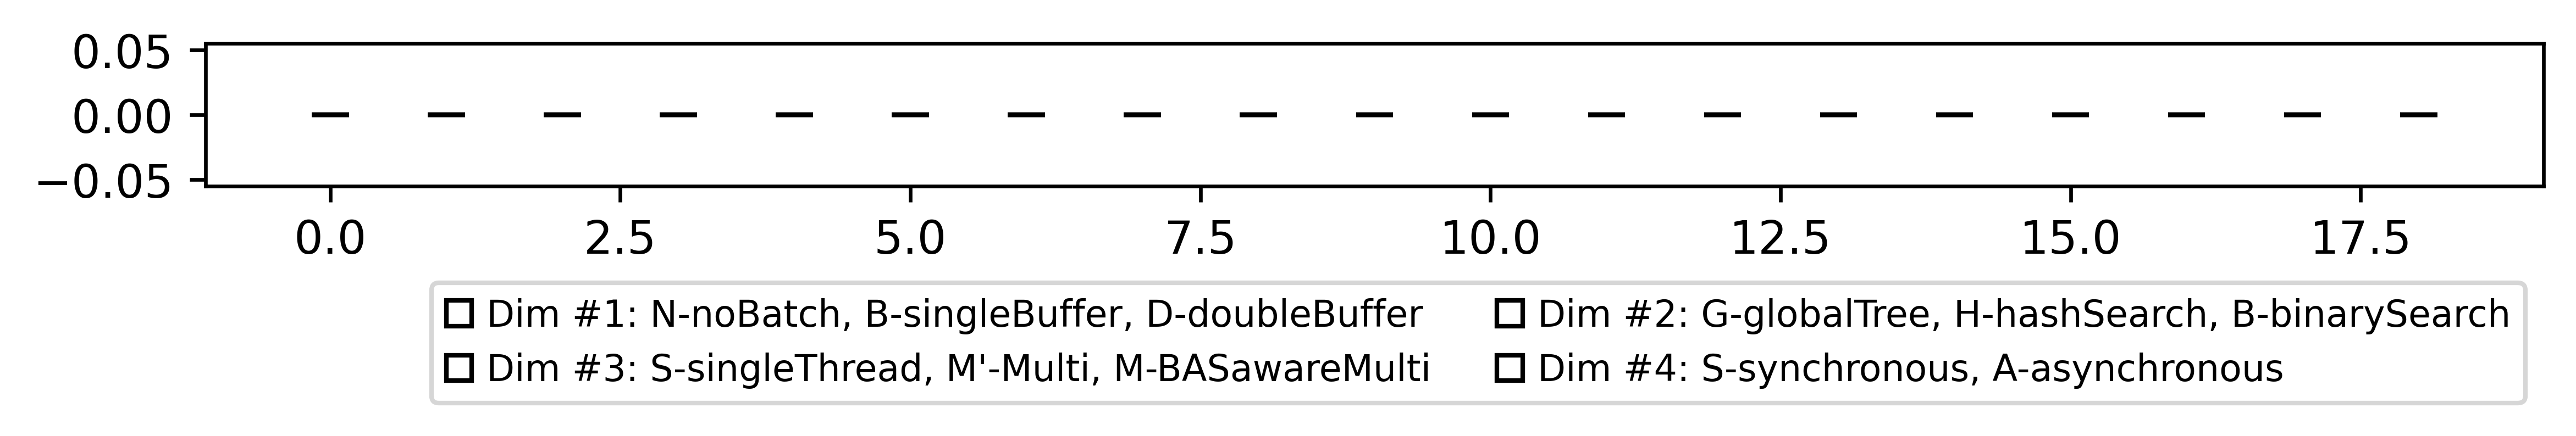

In [6]:
taskList = [[folder+"/"+datasize+"_"+file[k]+"_"+datatype[i]+"_"+date+".out" for k in range(len(file))] for i in range(len(datatype))]
runall(taskList)